In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import scipy as sp

# Operaciones basicas

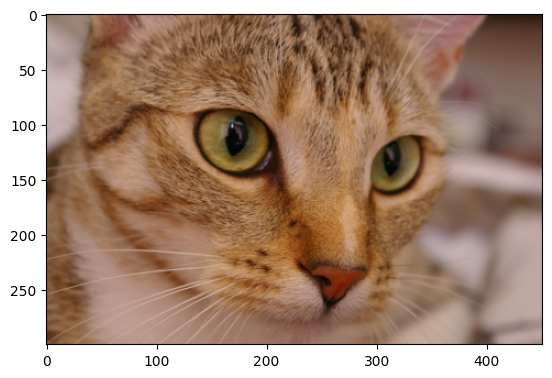

In [2]:
image = ski.data.cat()
plt.imshow(image)

In [67]:
for m in dir(ski): print(m) #Submodulos disponibles 

__version__
color
data
draw
exposure
feature
filters
future
graph
io
measure
metrics
morphology
registration
restoration
segmentation
transform
util


In [4]:
camera = ski.data.camera()
camera.dtype

dtype('uint8')

In [5]:
camera.shape

(512, 512)

numpy.ndarray

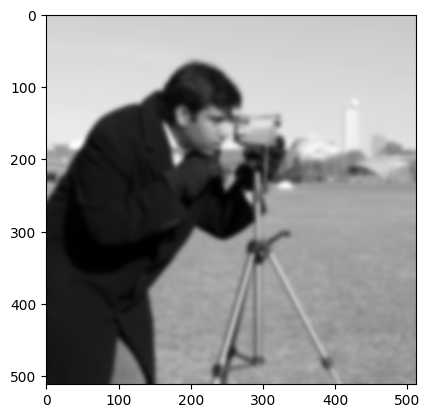

In [8]:
filtered_camera = ski.filters.gaussian(camera, sigma=3) #Filtro gaussiano funciona igual que con scipy
plt.imshow(filtered_camera, cmap='gray')
type(filtered_camera)

In [9]:
ski.io.imsave("cat.png", image) #Para guardar imagenes

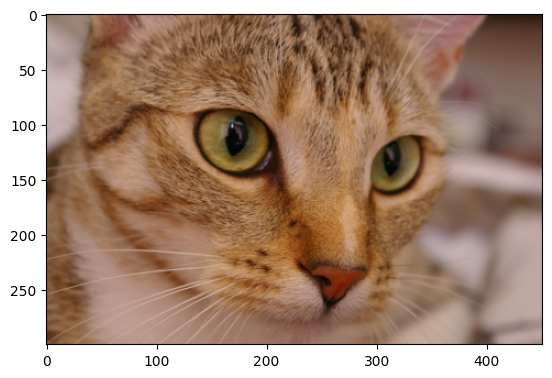

In [11]:
cat = ski.io.imread("cat.png") #Leer imagenes locales
plt.imshow(cat)

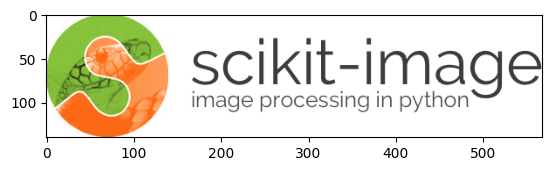

In [12]:
logo = ski.io.imread('https://scikit-image.org/_static/img/logo.png') #Para cargar una imagen de internet
plt.imshow(logo)

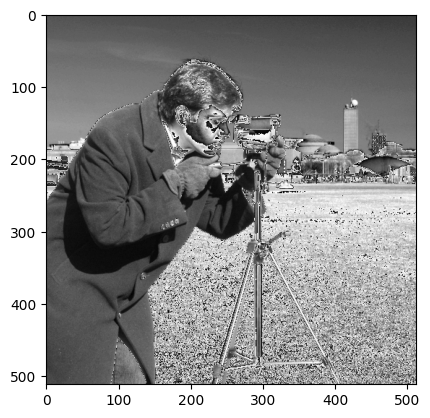

In [15]:
plt.imshow(camera*3, cmap='gray') #Multiplicar la imagen por un escalar

In [18]:
camera_float = ski.util.img_as_float(camera)
camera.max(), camera_float.max()

(255, 1.0)

Dependiendo de la operacion que se le haga a la imagen puede cambiar su tipo de dato y con esto los valores de sus pixeles

(768, 1024, 3)

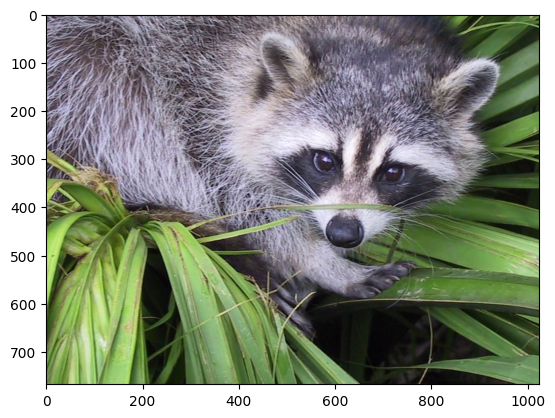

In [22]:
face = sp.datasets.face()
plt.imshow(face)
face.shape #Las imagenes tienen 3 canales RGB, hasta un posible cuarto referente a la trasnparencia

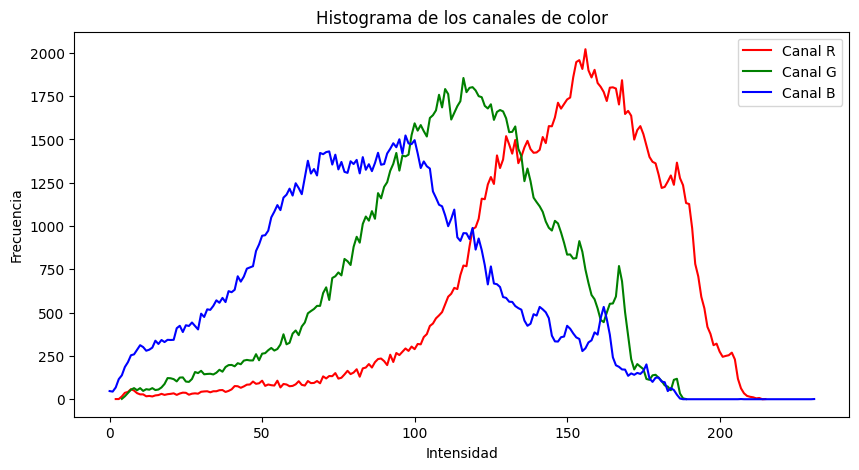

In [26]:
def plot_color_histogram(image): #Histograma de los canales de color
    colors = ('r', 'g', 'b')
    channel_ids = (0, 1, 2)
    
    plt.figure(figsize=(10, 5))
    
    for channel_id, color in zip(channel_ids, colors):
        histogram, bin_edges = ski.exposure.histogram(image[:, :, channel_id]) #Esta es la funcion que calcula el histograma
        plt.plot(bin_edges, histogram, color=color, label=f'Canal {color.upper()}')
    
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.title('Histograma de los canales de color')
    plt.show()

plot_color_histogram(cat)


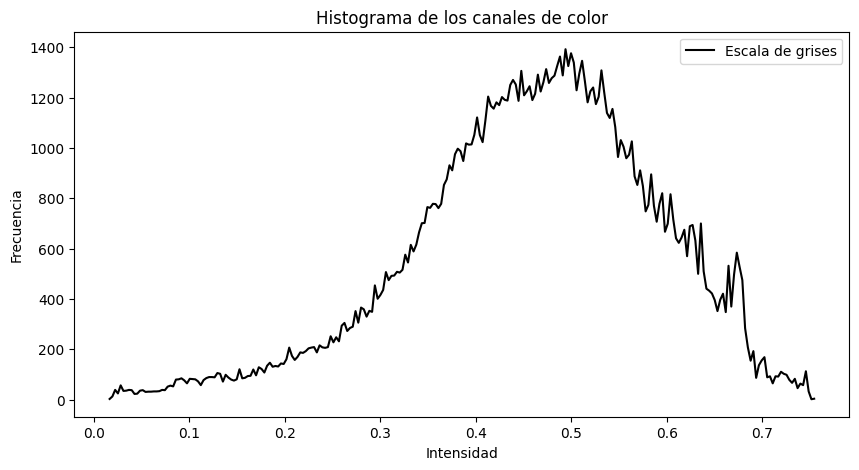

In [41]:
def plot_gray_histogram(image):
    plt.figure(figsize=(10, 5))
    image_gray = ski.color.rgb2gray(image)
    histogram, bin_edges = ski.exposure.histogram(image_gray) #Esta es la funcion que calcula el histograma
    plt.plot(bin_edges, histogram,color='black', label='Escala de grises')
    
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.title('Histograma de la escala de grises')
    plt.show()

plot_gray_histogram(cat)

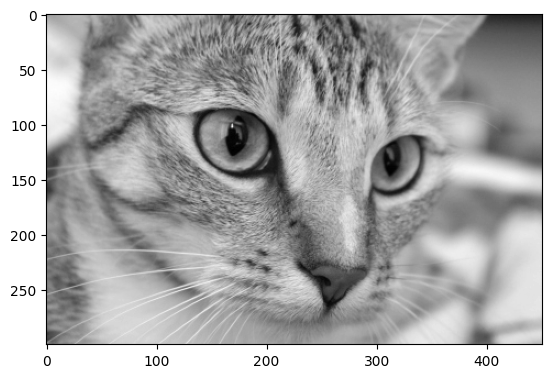

In [43]:
cat_gray = ski.color.rgb2gray(cat)#Convertir a escala de grises
plt.imshow(cat_gray, cmap='gray')

# Pre-procesamiento

## Filtros locales

### Filtro sobel

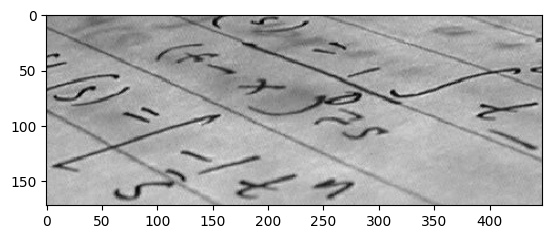

In [35]:
text = ski.data.text()
plt.imshow(text, cmap='gray')

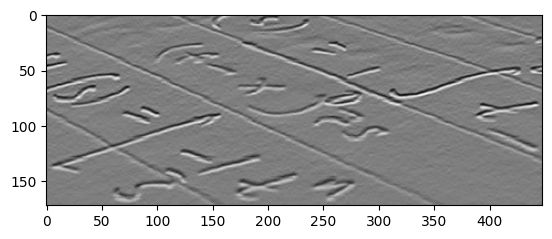

In [38]:
hsobel_text = ski.filters.sobel_h(text)
plt.imshow(hsobel_text, cmap='gray')

Determinan el valor de un pixel dependiendo del valor de sus vecinos

## Filtros no locales

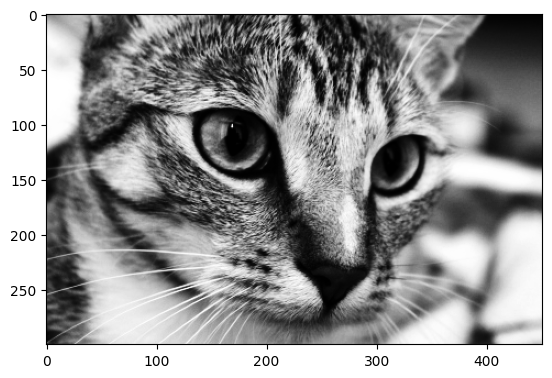

In [46]:
cat_gray_equalized = ski.exposure.equalize_hist(cat_gray)
plt.imshow(cat_gray_equalized, cmap='gray')

Text(0.5, 1.0, 'Histograma de la escala de grises')

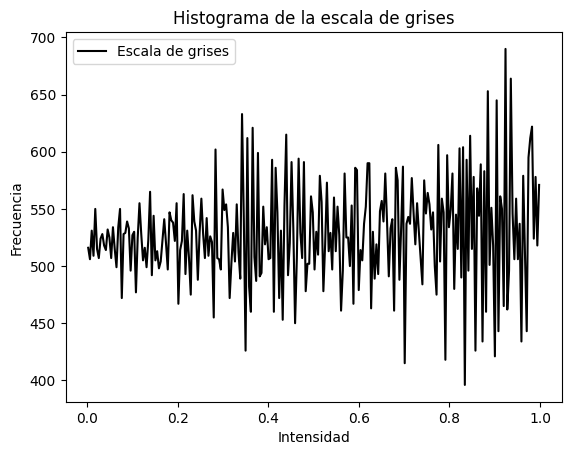

In [49]:
histogram, bin_edges = ski.exposure.histogram(cat_gray_equalized) #Esta es la funcion que calcula el histograma
plt.plot(bin_edges, histogram,color='black', label='Escala de grises')

plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma de la escala de grises')

## Morfologia Matematica

### Estructuras

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

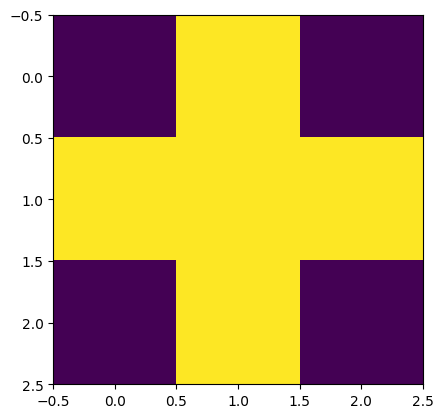

In [65]:
basic = ski.morphology.diamond(1) #Estructura basica para operaciones morfologicas
plt.imshow(basic)
basic

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

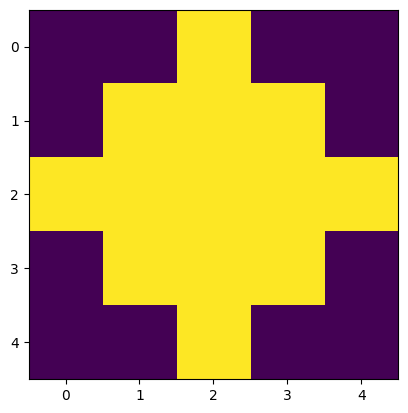

In [82]:
diamond = ski.morphology.diamond(2) #Otra estructura 
plt.imshow(diamond)
diamond

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

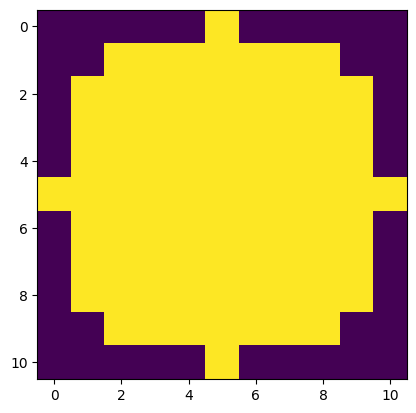

In [60]:
disk = ski.morphology.disk(5) #Otra estructura
plt.imshow(disk)
disk

### Erosion

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

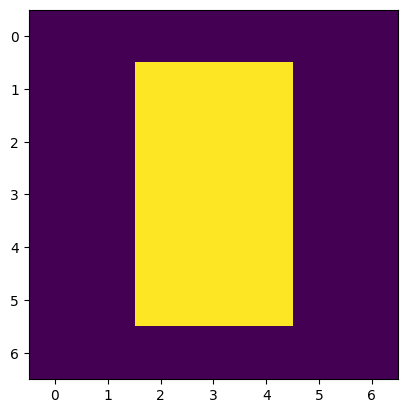

In [72]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
plt.imshow(a)
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

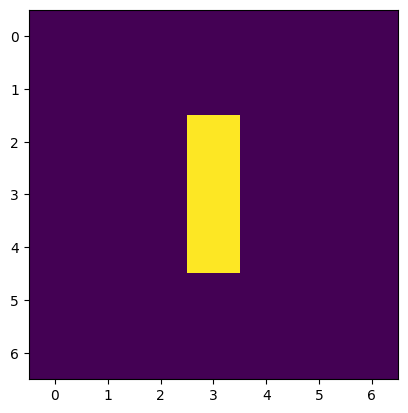

In [78]:
plt.imshow(ski.morphology.binary_erosion(a).astype(np.uint8)) #A partir de la estructura toma el valor minimo dentro de esta
ski.morphology.binary_erosion(a).astype(np.uint8) 

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

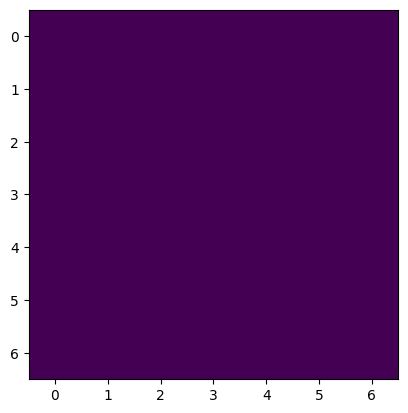

In [83]:
plt.imshow(ski.morphology.binary_erosion(a, ski.morphology.diamond(2)).astype(np.uint8)) 
ski.morphology.binary_erosion(a, ski.morphology.diamond(2)).astype(np.uint8) #Erosion con una estructura diferente

### Dilatacion

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

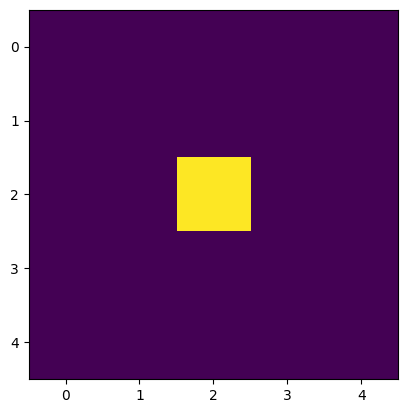

In [84]:
a = np.zeros((5, 5))
a[2, 2] = 1
plt.imshow(a)
a

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

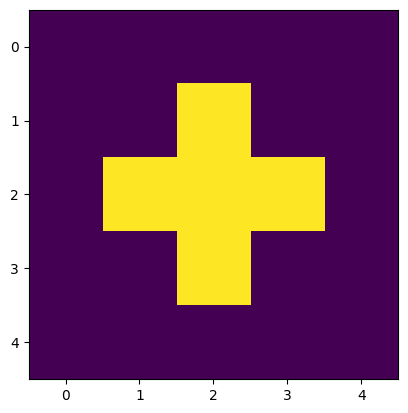

In [86]:
plt.imshow(ski.morphology.binary_dilation(a).astype(np.uint8)) #A partir de la estructura toma el valor maximo dentro de esta
ski.morphology.binary_dilation(a, ski.morphology.diamond(1)).astype(np.uint8)

### Opening

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

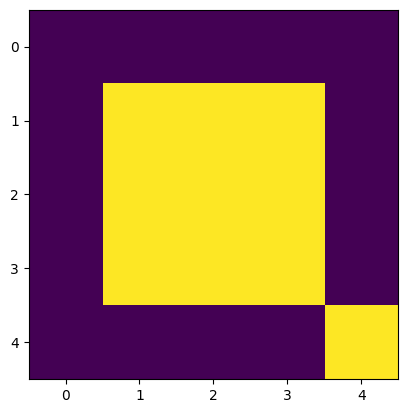

In [87]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
plt.imshow(a)
a

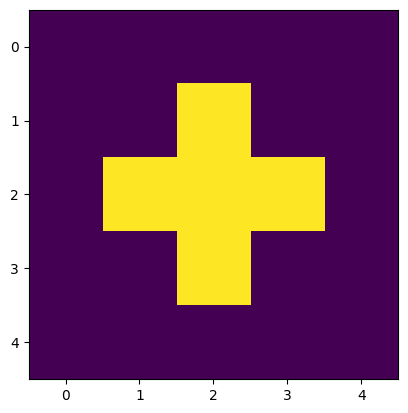

In [88]:
ski.morphology.binary_opening(a, ski.morphology.diamond(1)).astype(np.uint8) # Primero erosion y luego dilatacion
plt.imshow(ski.morphology.binary_opening(a, ski.morphology.diamond(1)).astype(np.uint8))

### Filtros para denosing

Text(0.5, 1.0, 'TV filter')

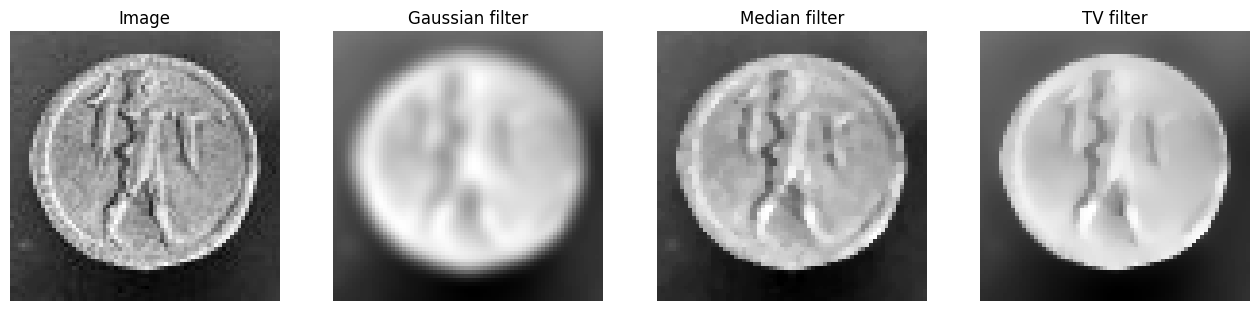

In [89]:
coins = ski.data.coins()
gaussian_filter_coins = ski.filters.gaussian(coins, sigma=2)
med_filter_coins = ski.filters.median(coins, np.ones((3, 3)))
tv_filter_coins = ski.restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Image")
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Gaussian filter")
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Median filter")
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest") #Buscar como funciona este filtro
plt.axis("off")
plt.title("TV filter") 

# Segmentacion

## Metodo Otsu (En base a un histrograma)

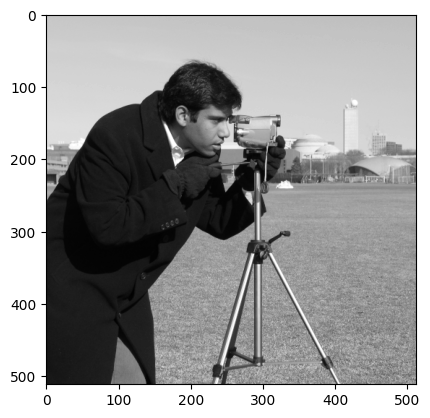

In [90]:
plt.imshow(camera,cmap='gray') #Nota buscar como funciona el metodo otsu

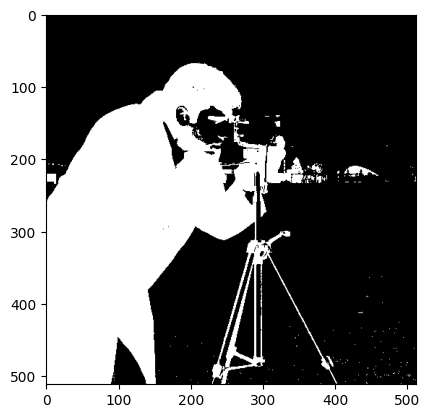

In [91]:
val = ski.filters.threshold_otsu(camera) #Obtiene el valor de umbral de la imagen
mask = camera < val
plt.imshow(mask, cmap='gray')

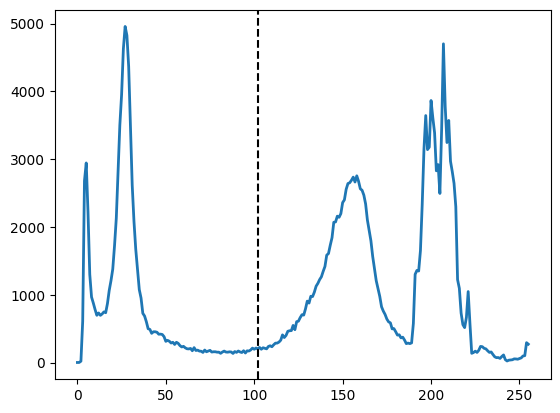

In [92]:
hist, bins_center = ski.exposure.histogram(camera)#Histograma y valor de umbral que separa los objetos de interes del fondo
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color="k", ls="--")

### Etiquetado de objetos conectados

Usualmente despues de obtener los objetos de interes en una imagen binarizacida se etiquetan para facilitar su manipulacion

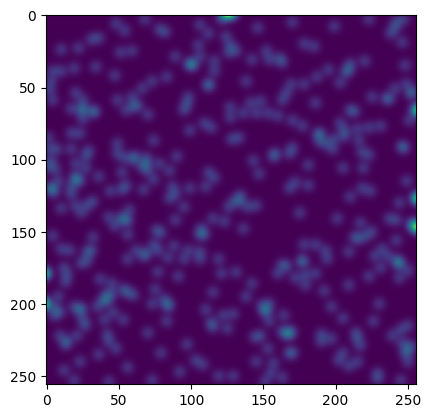

In [93]:
n = 20
l = 256
im = np.zeros((l, l))
rng = np.random.default_rng()
points = l * rng.random((2, n ** 2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ski.filters.gaussian(im, sigma=l / (4. * n))
plt.imshow(im) #Imagen generada

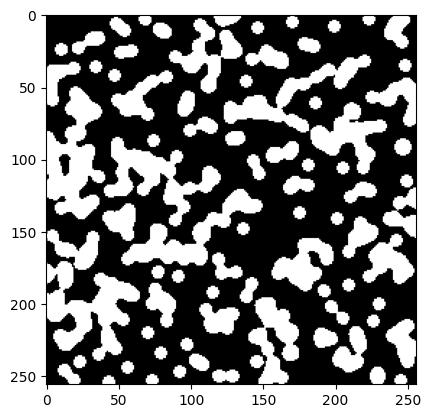

In [94]:
blobs = im > im.mean()
plt.imshow(blobs, cmap='gray') #Mascara

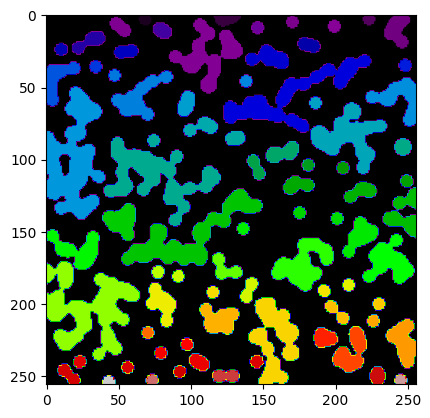

In [95]:
all_labels = ski.measure.label(blobs)
plt.imshow(all_labels, cmap='nipy_spectral') #Etiquetado de la imagen considerando el fondo como un "Objeto" a etiquetar

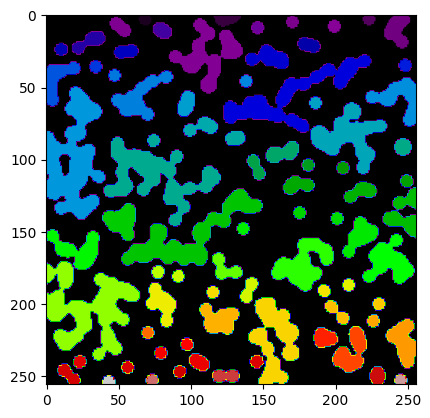

In [96]:
blobs_labels = ski.measure.label(blobs, background=0) #Etiquetado de la imagen considerando eliminado el fondo como un "Objeto" a etiquetar
plt.imshow(blobs_labels, cmap='nipy_spectral')

## En base a marcadores

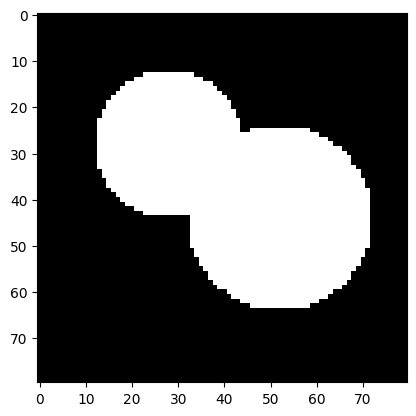

In [97]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52 #Coordenadas del centro de los circulos
r1, r2 = 16, 20 # Radios de los circulos
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2 #Mascaras de dos circulos
image = np.logical_or(mask_circle1, mask_circle2) #Union de las mascaras
plt.imshow(image, cmap='gray') #Imagen original

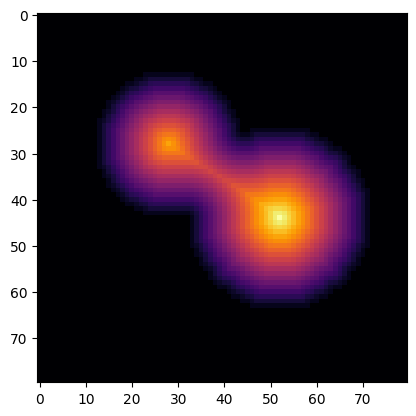

In [98]:
distance = sp.ndimage.distance_transform_edt(image) #Varia los valores de la imagen dependiendo de la distancia al objeto mas cercano
plt.imshow(distance, cmap='inferno')

### Watersheed

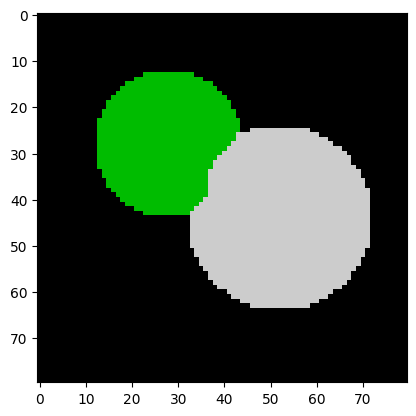

In [105]:
peak_idx = ski.feature.peak_local_max(distance, footprint=np.ones((3, 3)), labels=image) #Encuentra los picos locales de la imagen
peak_mask = np.zeros_like(distance, dtype=bool) #Mascara de los picos
peak_mask[tuple(peak_idx.T)] = True #Se marcan los picos en la mascara
markers = ski.morphology.label(peak_mask) #Etiquetado de los picos
labels_ws = ski.segmentation.watershed(-distance, markers, mask=image) #Segmentacion de la imagen
plt.imshow(labels_ws, cmap='nipy_spectral')

### Random Walker

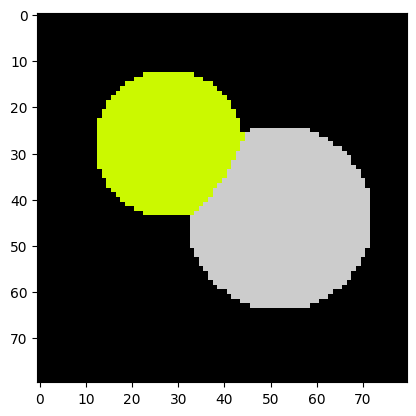

In [106]:
markers[~image] = -1 #Se marcan los puntos que no son objetos, la virguililla es para invertir los valores la mascara
labels_rw = ski.segmentation.random_walker(image, markers)
plt.imshow(labels_rw, cmap='nipy_spectral')

Nota: Buscar como funcionan ambos metodos de segmentacion para determinar cuando es conveniente usar uno u otro